In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Load dataset
df = pd.read_csv('/content/Electric Vehicle Sales by State in India.csv')
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [13]:
# Data preprocessing
df['Year'] = df['Year'].astype(int)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
categorical_cols = ['Month_Name', 'State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type']
df[categorical_cols] = df[categorical_cols].astype('category')

In [14]:
# Inspect data
print('Duplicates:', df.duplicated().sum())
print('Missing values:', df.isnull().sum())

Duplicates: 0
Missing values: Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


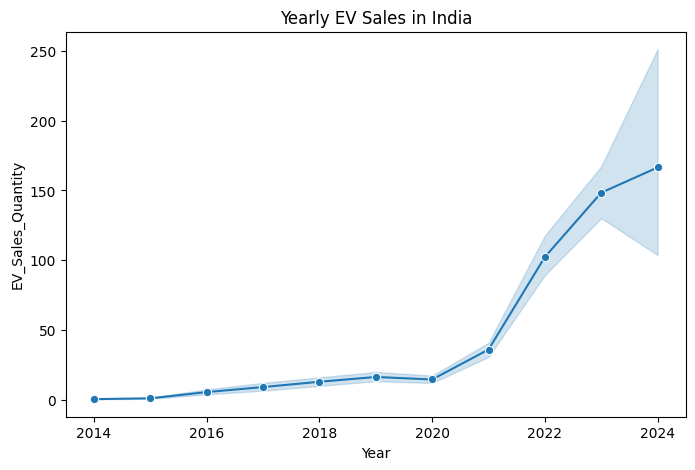

In [15]:
# EDA
plt.figure(figsize=(8,5))
sns.lineplot(x='Year', y='EV_Sales_Quantity', data=df, marker='o')
plt.title('Yearly EV Sales in India')
plt.show()

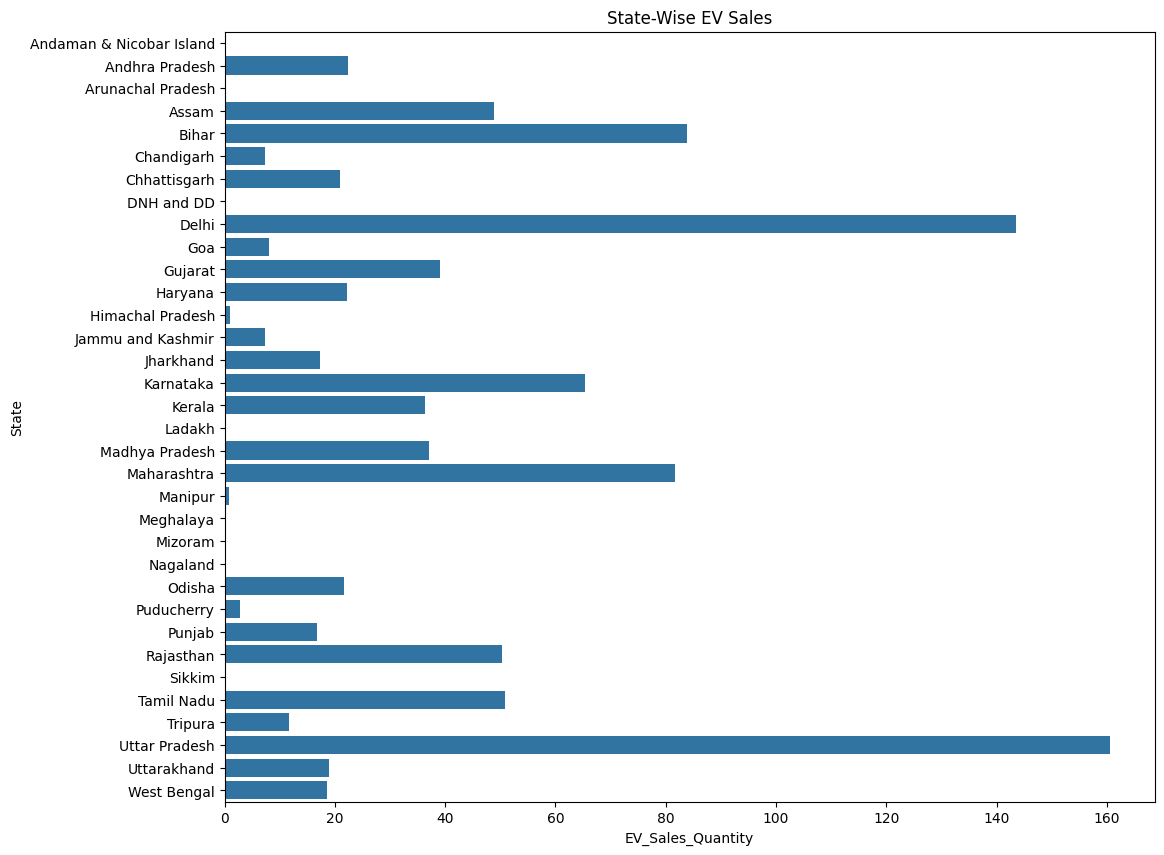

In [16]:
plt.figure(figsize=(12,10))
sns.barplot(y='State', x='EV_Sales_Quantity', data=df, ci=None)
plt.title('State-Wise EV Sales')
plt.show()

In [17]:
# Feature Engineering
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.drop(['Date'], axis=1, inplace=True)

In [10]:
# Modeling
X = df_encoded.drop('EV_Sales_Quantity', axis=1)
y = df_encoded['EV_Sales_Quantity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 131.11093266362988


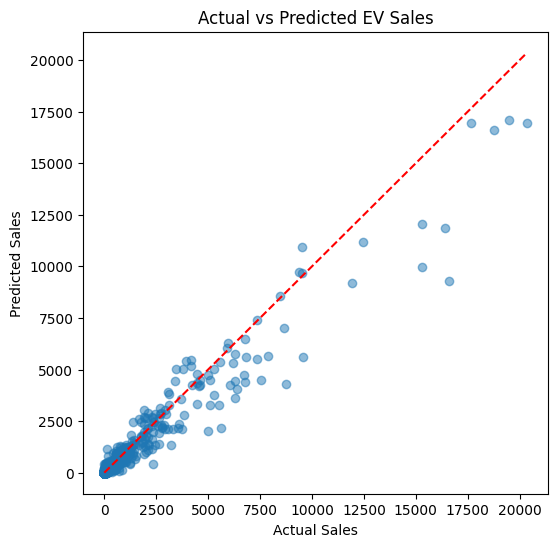

In [18]:
# Evaluation
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted EV Sales')
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')
plt.show()

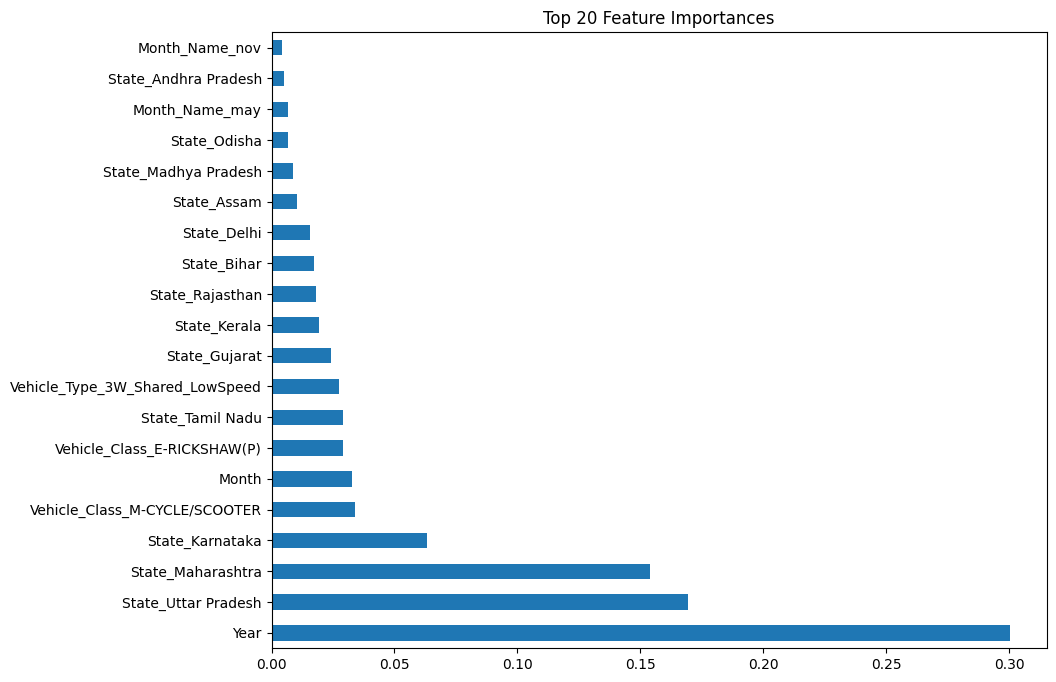

In [19]:
# Feature importance
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(10,8), title='Top 20 Feature Importances')
plt.show()